In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import preprocess as pp

import pickle

In [2]:
data = pd.read_csv("../data/train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
data.YearRemodAdd.describe()

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

In [6]:
data.OverallQual.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: OverallQual
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


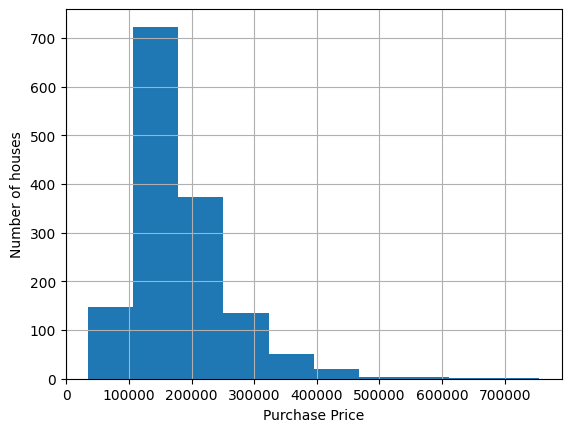

In [7]:
# Having a look at the target variable.
# The distribution is skewed to the right. We can later try to log-transform it to make it more normally distributed.
data['SalePrice'].hist()
plt.ylabel('Number of houses')
plt.xlabel('Purchase Price')
plt.show()

In [8]:
# Defining y and X for our split. For now, we will keep it simple and only use a few important variables.
y = data.SalePrice
X = data[["OverallQual","GrLivArea","YrSold", "YearRemodAdd"]]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [10]:
scaler = StandardScaler()

In [11]:
X_train_scaled = scaler.fit_transform(X_train)

In [12]:
X_test_scaled = scaler.fit_transform(X_test)


In [13]:
X_train_scaled

array([[ 0.63603069,  0.28783473,  0.14029267, -0.71164439],
       [-0.82305655, -0.86156463, -1.36896114,  0.97616358],
       [ 0.63603069,  0.03345946,  1.64954649,  1.16905592],
       ...,
       [-0.82305655, -1.25349097, -1.36896114,  0.25281731],
       [ 0.63603069, -0.19453615, -0.61433423,  0.63860199],
       [ 0.63603069,  0.04853355,  0.89491958,  1.07260975]])

In [14]:
regression = LinearRegression()

In [15]:
regression.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:
regression.score(X_test_scaled,y_test)

0.7518483119319779

In [17]:
Preprocessor = pp.TimeSinceRenovation(yr_sold="YrSold", yr_ren="YearRemodAdd")

In [18]:
Preprocessor.transform(X)

c:\Users\tobia\Documents\DataScience\pipeline\notebooks\preprocess.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["YearsSinceRenovation"] = X[self.yr_sold] - X[self.yr_ren]


,OverallQual,GrLivArea,YrSold,YearRemodAdd,YearsSinceRenovation
0,7,1710,2008,2003,5
1,6,1262,2007,1976,31
2,7,1786,2008,2002,6
3,7,1717,2006,1970,36
4,8,2198,2008,2000,8
...,...,...,...,...,...
1455,6,1647,2007,2000,7
1456,6,2073,2010,1988,22
1457,7,2340,2010,2006,4
1458,5,1078,2010,1996,14


In [19]:
drop_variables = ["YrSold", "YearRemodAdd"]

In [20]:
Dropper = pp.DropColumns(drop_variables)

In [21]:
Dropper.transform(X)

c:\Users\tobia\Documents\DataScience\pipeline\notebooks\preprocess.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(column, axis=1, inplace=True)
c:\Users\tobia\Documents\DataScience\pipeline\notebooks\preprocess.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(column, axis=1, inplace=True)


,OverallQual,GrLivArea,YearsSinceRenovation
0,7,1710,5
1,6,1262,31
2,7,1786,6
3,7,1717,36
4,8,2198,8
...,...,...,...
1455,6,1647,7
1456,6,2073,22
1457,7,2340,4
1458,5,1078,14


In [22]:
pipeline = Pipeline([
    ("preprocess", Preprocessor),
    ("dropper", Dropper),
    ("scaler", StandardScaler()),
    ("regression", regression)
    ])

In [23]:
# train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 TimeSinceRenovation(yr_ren='YearRemodAdd', yr_sold='YrSold')),
                ('dropper', DropColumns(variables=['YrSold', 'YearRemodAdd'])),
                ('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [24]:
predictions = pipeline.predict(X_test)

In [25]:
print(r2_score(y_test, predictions))

0.7513892415520099


In [26]:
with open("trained_pipeline-0.1.0.pkl", "wb") as f:
    pickle.dump(pipeline, f)